In [1]:
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd

In [2]:
plt.rcdefaults()

# Visualization
SMALL_SIZE = 18
MEDIUM_SIZE = 24
BIGGER_SIZE = 30
LW = 1.2

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', lw=lw_ax, labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# plt.rc('lines', lw=3)                    # thicker black lines
# plt.rc('grid', c='0.5', ls='-', lw=0.5)  # solid gray grid lines
# plt.rc('savefig', dpi=150)
# plt.tick_params(direction='out', length=10, width=lw_ax)
# rcdefaults()                           # restore [global] defaults

# the axes attributes need to be set before the call to subplot
plt.rcParams.update({
    "font.size": SMALL_SIZE,
    "xtick.major.size": 5,
    "xtick.major.pad": 7,
    "xtick.major.size": 10,
    "xtick.major.width": LW,
    "xtick.labelsize": SMALL_SIZE,
    "ytick.major.size": 5,
    "ytick.major.pad": 7,
    "ytick.major.size": 10,
    "ytick.major.width": LW,
    "xtick.labelsize": SMALL_SIZE,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "lines.color": "g",
    "axes.linewidth": LW,
    "axes.labelsize": MEDIUM_SIZE,
    "legend.fontsize": SMALL_SIZE,
})

## p-test, 16 qubits

In [3]:
# Guadalupe
TESTDATA = StringIO("""
p  d_mean  d_std  cx_mean  cx_std
1  182.3  14.77  297.3  17.85
2  356.3  22.38  656.2  32.92
4  670.9  31.74  1399.5 61.51
8  1365.2 35.07  2839.7 72.12
12 1985.2 49.89  4262.2 79.54
""")
df_p_guad = pd.read_table(TESTDATA, sep="\s+")

In [4]:
# Guadalupe
TESTDATA = StringIO("""
p  d_mean  d_std  cx_mean  cx_std
1  217.3 36.05  343.6 39.0
2  383.3 36.90  764.6 66.41
4  672.3 79.62  1415.7 135.60
8  1322.6 60.87 2844.2 108.63
12 1942.6 74.21 4304.3 140.08
""")
df_p_mum = pd.read_table(TESTDATA, sep="\s+")

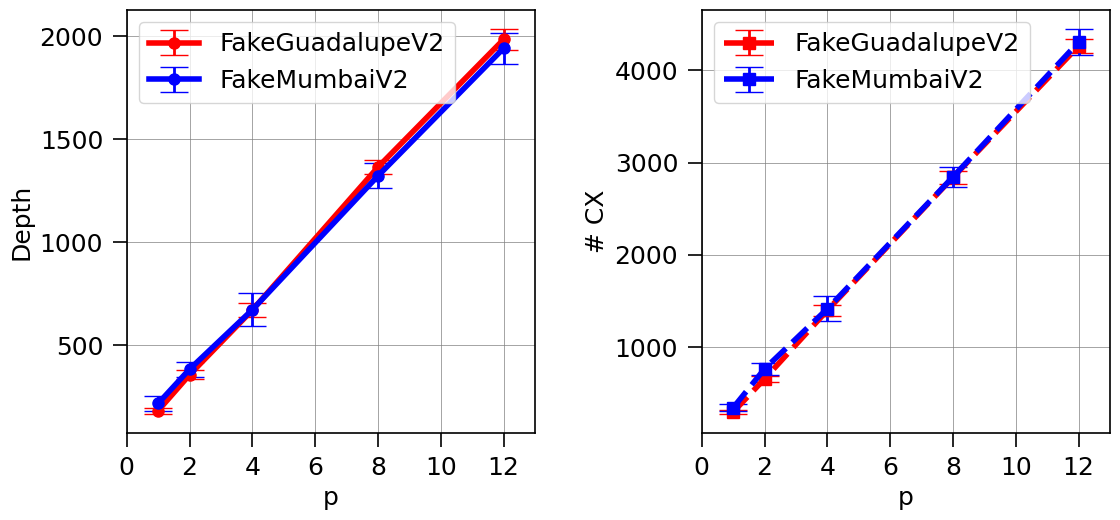

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# depth
ax[0].errorbar(df_p_guad["p"], df_p_guad["d_mean"], yerr=df_p_guad["d_std"], marker="o", markersize=8, linestyle="-", lw=4, elinewidth=2, capsize=10, color="red", label="FakeGuadalupeV2")
ax[0].errorbar(df_p_mum["p"], df_p_mum["d_mean"], yerr=df_p_mum["d_std"], marker="o", markersize=8, linestyle="-", lw=4, elinewidth=2, capsize=10, color="blue", label="FakeMumbaiV2")

ax[0].set_xlabel('p')
ax[0].set_ylabel('Depth')

# cx gates
ax[1].errorbar(df_p_guad["p"], df_p_guad["cx_mean"], yerr=df_p_guad["cx_std"], marker="s", markersize=8, linestyle="--", lw=4, elinewidth=2, capsize=10, color="red", label="FakeGuadalupeV2")
ax[1].errorbar(df_p_mum["p"], df_p_mum["cx_mean"], yerr=df_p_mum["cx_std"], marker="s", markersize=8, linestyle="--", lw=4, elinewidth=2, capsize=10, color="blue", label="FakeMumbaiV2")

ax[1].set_xlabel('p')
ax[1].set_ylabel('# CX')


for i in range(2):
    ax[i].set_xticks(np.arange(0, 13, 2))
    ax[i].set_xlim(0, 13)
    ax[i].legend()
    ax[i].grid()
    
plt.tight_layout(pad=2)
plt.show()

## X mixer (original QAOA)

In [7]:
# Guadalupe
TESTDATA = StringIO("""
n_qubits  d_mean  d_std  cx_mean  cx_std
8   106.4 11.91  120.3 6.00
16  182.3 14.76  297.3 17.84
""")
df_n_x_guad_unorg = pd.read_table(TESTDATA, sep="\s+")

# organized
TESTDATA = StringIO("""
n_qubits  d_mean  d_std  cx_mean  cx_std
8   86.9 17.20  125.0 13.29
16  185.7 15.65  365.2 15.60
""")
df_n_x_guad_org = pd.read_table(TESTDATA, sep="\s+")

In [8]:
# Mumbai
TESTDATA = StringIO("""
n_qubits  d_mean  d_std  cx_mean  cx_std
8   112.7 11.67  121.8 6.86
16  217.3 36.05  343.6 39.05
24  360.9 25.65  680.3 48.95
""")
df_n_x_mum_unorg = pd.read_table(TESTDATA, sep="\s+")

# organized
TESTDATA = StringIO("""
n_qubits  d_mean  d_std  cx_mean  cx_std
8   84.6 8.36  114.1 6.04
16  194.4 25.45  393.5 37.61
24  258.4 41.42  806.5 40.50
""")
df_n_x_mum_org = pd.read_table(TESTDATA, sep="\s+")

In [9]:
# Washington
TESTDATA = StringIO("""
n_qubits  d_mean  d_std  cx_mean  cx_std
8   113.4 14.17  114.5 6.88
16  208.8 27.24  345.5 34.78
24  341.9 26.43  663.6 45.96
32  550.3 26.57  1203.1 49.01
""")
df_n_x_was_unorg = pd.read_table(TESTDATA, sep="\s+")

# organized
TESTDATA = StringIO("""
n_qubits  d_mean  d_std  cx_mean  cx_std
8   90.2 10.57  119.5 11.13
16  203.3 30.60  398.3 38.07
24  264.4 41.04  836.5 74.82
32  409.0 33.94  1397.7 51.67
""")
df_n_x_was_org = pd.read_table(TESTDATA, sep="\s+")

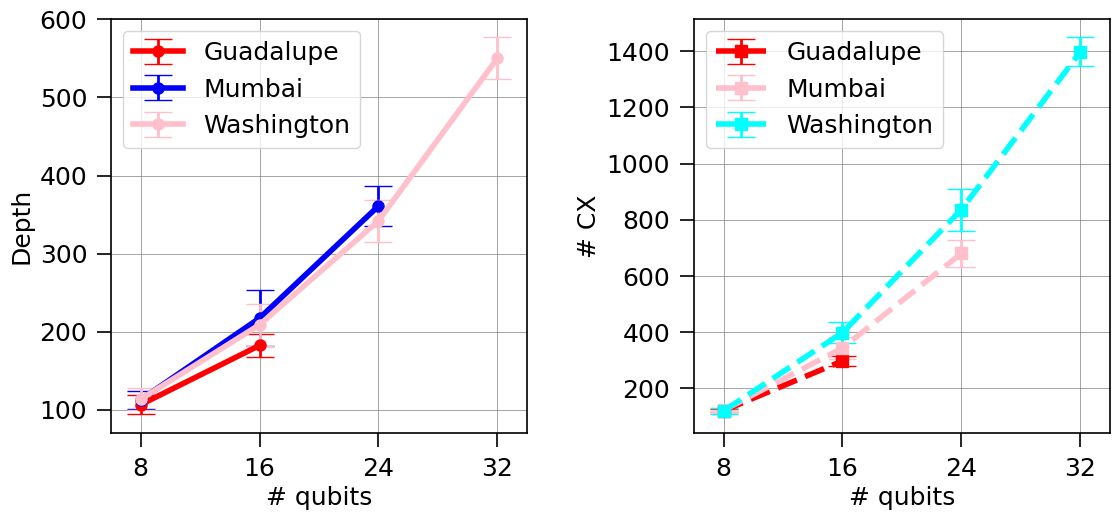

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# depth
ax[0].errorbar(df_n_x_guad_unorg["n_qubits"], df_n_x_guad_unorg["d_mean"], yerr=df_n_x_guad_unorg["d_std"], marker="o", markersize=8, linestyle="-", lw=4, elinewidth=2, capsize=10, color="red", label="Guadalupe")
ax[0].errorbar(df_n_x_mum_unorg["n_qubits"], df_n_x_mum_unorg["d_mean"], yerr=df_n_x_mum_unorg["d_std"], marker="o", markersize=8, linestyle="-", lw=4, elinewidth=2, capsize=10, color="blue", label="Mumbai")
ax[0].errorbar(df_n_x_was_unorg["n_qubits"], df_n_x_was_unorg["d_mean"], yerr=df_n_x_was_unorg["d_std"], marker="o", markersize=8, linestyle="-", lw=4, elinewidth=2, capsize=10, color="pink", label="Washington")


ax[0].set_xlabel('# qubits')
ax[0].set_ylabel('Depth')

# cx gates
ax[1].errorbar(df_n_x_guad_unorg["n_qubits"], df_n_x_guad_unorg["cx_mean"], yerr=df_n_x_guad_unorg["cx_std"], marker="s", markersize=8, linestyle="--", lw=4, elinewidth=2, capsize=10, color="red", label="Guadalupe")
ax[1].errorbar(df_n_x_mum_unorg["n_qubits"], df_n_x_mum_unorg["cx_mean"], yerr=df_n_x_mum_unorg["cx_std"], marker="s", markersize=8, linestyle="--", lw=4, elinewidth=2, capsize=10, color="pink", label="Mumbai")
ax[1].errorbar(df_n_x_was_org["n_qubits"], df_n_x_was_org["cx_mean"], yerr=df_n_x_was_org["cx_std"], marker="s", markersize=8, linestyle="--", lw=4, elinewidth=2, capsize=10, color="cyan", label="Washington")


ax[1].set_xlabel('# qubits')
ax[1].set_ylabel('# CX')


for i in range(2):
    ax[i].set_xticks(np.arange(8, 33, 8))
    ax[i].set_xlim(6, 34)
    ax[i].legend()
    ax[i].grid()
    
plt.tight_layout(pad=2)
plt.show()

## XY mixer

In [10]:
# Guadalupe
TESTDATA = StringIO("""
n_qubits  d_mean  d_std  cx_mean  cx_std
8   143.2 10.78  157.2 14.62
16  251.8 15.75  478.5 29.67
""")
df_n_xy_guad_unorg = pd.read_table(TESTDATA, sep="\s+")

# organized
TESTDATA = StringIO("""
n_qubits  d_mean  d_std  cx_mean  cx_std
8   119.6 13.35  156.2 12.23
16  221.7 15.49  451.4 25.58
""")
df_n_xy_guad_org = pd.read_table(TESTDATA, sep="\s+")

In [11]:
# Mumbai
TESTDATA = StringIO("""
n_qubits  d_mean  d_std  cx_mean  cx_std
8   140.7 9.63  149.6 13.20
16  274.7 47.15 509.0 35.44
24  439.5 34.09  1020.3 47.65
""")
df_n_xy_mum_unorg = pd.read_table(TESTDATA, sep="\s+")

# organized
TESTDATA = StringIO("""
n_qubits  d_mean  d_std  cx_mean  cx_std
8   116.5 18.72  153.6 12.62
16  267.8 27.92  489.4 33.43
24  305.2 23.57  920.9 49.03
""")
df_n_xy_mum_org = pd.read_table(TESTDATA, sep="\s+")

In [12]:
# Washington
TESTDATA = StringIO("""
n_qubits  d_mean  d_std  cx_mean  cx_std
8   148.3 11.23  160.4 12.64
16  260.1 27.65  508.6 16.81
24  424.5 30.77  1020.3 49.80
32  640.4 47.48  1710.4 61.93
""")
df_n_xy_was_unorg = pd.read_table(TESTDATA, sep="\s+")

# organized
TESTDATA = StringIO("""
n_qubits  d_mean  d_std  cx_mean  cx_std
8   120.7 18.41  156.0 12.42
16  248.9 33.51  470.3 33.96
24  340.4 29.22  988.9 31.44
32  482.1 66.70  1567.1 126.07
""")
df_n_xy_was_org = pd.read_table(TESTDATA, sep="\s+")

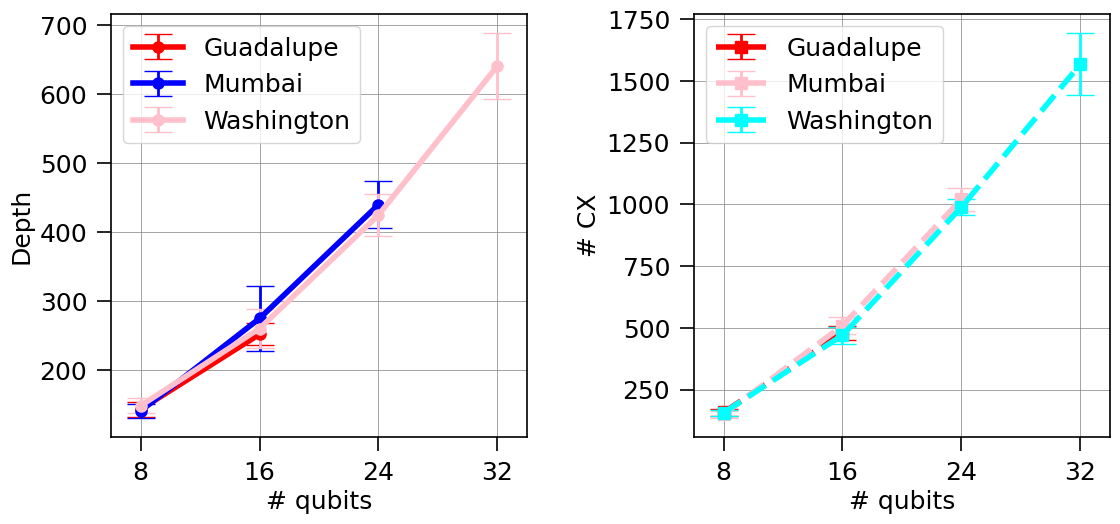

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# depth
ax[0].errorbar(df_n_xy_guad_unorg["n_qubits"], df_n_xy_guad_unorg["d_mean"], yerr=df_n_xy_guad_unorg["d_std"], marker="o", markersize=8, linestyle="-", lw=4, elinewidth=2, capsize=10, color="red", label="Guadalupe")
ax[0].errorbar(df_n_xy_mum_unorg["n_qubits"], df_n_xy_mum_unorg["d_mean"], yerr=df_n_xy_mum_unorg["d_std"], marker="o", markersize=8, linestyle="-", lw=4, elinewidth=2, capsize=10, color="blue", label="Mumbai")
ax[0].errorbar(df_n_xy_was_unorg["n_qubits"], df_n_xy_was_unorg["d_mean"], yerr=df_n_xy_was_unorg["d_std"], marker="o", markersize=8, linestyle="-", lw=4, elinewidth=2, capsize=10, color="pink", label="Washington")


ax[0].set_xlabel('# qubits')
ax[0].set_ylabel('Depth')

# cx gates
ax[1].errorbar(df_n_xy_guad_unorg["n_qubits"], df_n_xy_guad_unorg["cx_mean"], yerr=df_n_xy_guad_unorg["cx_std"], marker="s", markersize=8, linestyle="--", lw=4, elinewidth=2, capsize=10, color="red", label="Guadalupe")
ax[1].errorbar(df_n_xy_mum_unorg["n_qubits"], df_n_xy_mum_unorg["cx_mean"], yerr=df_n_xy_mum_unorg["cx_std"], marker="s", markersize=8, linestyle="--", lw=4, elinewidth=2, capsize=10, color="pink", label="Mumbai")
ax[1].errorbar(df_n_xy_was_org["n_qubits"], df_n_xy_was_org["cx_mean"], yerr=df_n_xy_was_org["cx_std"], marker="s", markersize=8, linestyle="--", lw=4, elinewidth=2, capsize=10, color="cyan", label="Washington")


ax[1].set_xlabel('# qubits')
ax[1].set_ylabel('# CX')


for i in range(2):
    ax[i].set_xticks(np.arange(8, 33, 8))
    ax[i].set_xlim(6, 34)
    ax[i].legend()
    ax[i].grid()
    
plt.tight_layout(pad=2)
plt.show()

## X vs XY

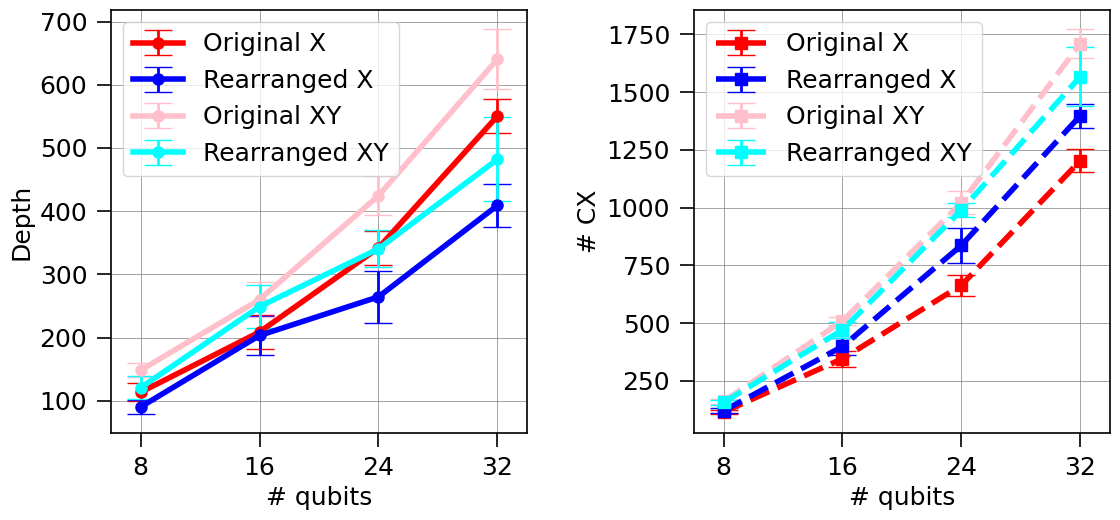

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# depth
ax[0].errorbar(df_n_x_was_unorg["n_qubits"], df_n_x_was_unorg["d_mean"], yerr=df_n_x_was_unorg["d_std"], marker="o", markersize=8, linestyle="-", lw=4, elinewidth=2, capsize=10, color="red", label="Original X")
ax[0].errorbar(df_n_x_was_org["n_qubits"], df_n_x_was_org["d_mean"], yerr=df_n_x_was_org["d_std"], marker="o", markersize=8, linestyle="-", lw=4, elinewidth=2, capsize=10, color="blue", label="Rearranged X")
ax[0].errorbar(df_n_xy_was_unorg["n_qubits"], df_n_xy_was_unorg["d_mean"], yerr=df_n_xy_was_unorg["d_std"], marker="o", markersize=8, linestyle="-", lw=4, elinewidth=2, capsize=10, color="pink", label="Original XY")
ax[0].errorbar(df_n_xy_was_org["n_qubits"], df_n_xy_was_org["d_mean"], yerr=df_n_xy_was_org["d_std"], marker="o", markersize=8, linestyle="-", lw=4, elinewidth=2, capsize=10, color="cyan", label="Rearranged XY")


ax[0].set_xlabel('# qubits')
ax[0].set_ylabel('Depth')

# cx gates
ax[1].errorbar(df_n_x_was_unorg["n_qubits"], df_n_x_was_unorg["cx_mean"], yerr=df_n_x_was_unorg["cx_std"], marker="s", markersize=8, linestyle="--", lw=4, elinewidth=2, capsize=10, color="red", label="Original X")
ax[1].errorbar(df_n_x_was_org["n_qubits"], df_n_x_was_org["cx_mean"], yerr=df_n_x_was_org["cx_std"], marker="s", markersize=8, linestyle="--", lw=4, elinewidth=2, capsize=10, color="blue", label="Rearranged X")
ax[1].errorbar(df_n_xy_was_unorg["n_qubits"], df_n_xy_was_unorg["cx_mean"], yerr=df_n_xy_was_unorg["cx_std"], marker="s", markersize=8, linestyle="--", lw=4, elinewidth=2, capsize=10, color="pink", label="Original XY")
ax[1].errorbar(df_n_xy_was_org["n_qubits"], df_n_xy_was_org["cx_mean"], yerr=df_n_xy_was_org["cx_std"], marker="s", markersize=8, linestyle="--", lw=4, elinewidth=2, capsize=10, color="cyan", label="Rearranged XY")


ax[1].set_xlabel('# qubits')
ax[1].set_ylabel('# CX')


for i in range(2):
    ax[i].set_xticks(np.arange(8, 33, 8))
    ax[i].set_xlim(6, 34)
    ax[i].legend()
    ax[i].grid()
    
plt.tight_layout(pad=2)
plt.show()